In [117]:
import pandas as pd
import numpy as np

In [118]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [119]:
x, y = make_regression(n_samples=1000   , n_features=5, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# print(x)
# print(y)

In [120]:
df = pd.DataFrame(x_train)
df['y_true'] = y_train


In [121]:
display(df)

,0,1,2,3,4,y_true
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413
...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694


In [122]:
df['y_pred_0'] = df['y_true'].mean()

display(df)

,0,1,2,3,4,y_true,y_pred_0
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702
...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_0 = mean_squared_error(df['y_true'], df['y_pred_0'])
mae_0 = mean_absolute_error(df['y_true'], df['y_pred_0'])

print(f'MSE_0: {mse_0}')
print(f'MAE_0: {mae_0}')

MSE_0: 4303.810849895619
MAE_0: 52.27351992412943


In [124]:
df['residuals_0'] = df['y_true'] - df['y_pred_0']
display(df)

,0,1,2,3,4,y_true,y_pred_0,residuals_0
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115
...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992


In [125]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_1.fit(df[[0,1,2,3,4]], df['residuals_0'])


DecisionTreeRegressor(max_depth=1, random_state=42)

In [126]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2,3,4]])
display(df)


,0,1,2,3,4,y_true,y_pred_0,residuals_0,tree_pred_1
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013,-44.698550
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320,-44.698550
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072,-44.698550
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655,35.839378
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115,-44.698550
...,...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554,-44.698550
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142,-44.698550
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573,-44.698550
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992,35.839378


[Text(0.5, 0.75, 'x[2] <= -0.091\nsquared_error = 4303.811\nsamples = 800\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 2916.762\nsamples = 356\nvalue = -44.699'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2529.52\nsamples = 444\nvalue = 35.839'),
 Text(0.625, 0.5, '  False')]

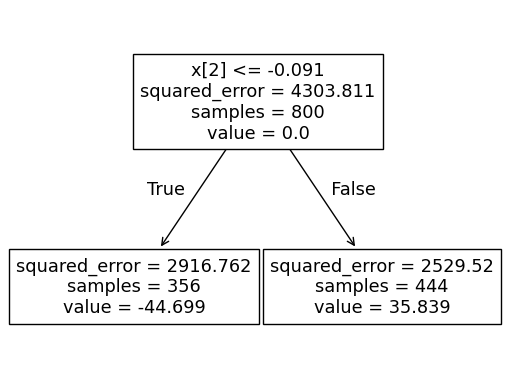

In [127]:
from sklearn.tree import plot_tree

plot_tree(tree_1)

In [128]:
display(df)


,0,1,2,3,4,y_true,y_pred_0,residuals_0,tree_pred_1
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013,-44.698550
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320,-44.698550
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072,-44.698550
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655,35.839378
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115,-44.698550
...,...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554,-44.698550
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142,-44.698550
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573,-44.698550
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992,35.839378


In [129]:
LEARNING_RATE = 0.1

In [130]:
df['y_pred_1'] = df['y_pred_0'] + LEARNING_RATE*df['tree_pred_1']
display(df)

mse_0 = mean_squared_error(df['y_true'], df['y_pred_0'])
mae_0 = mean_absolute_error(df['y_true'], df['y_pred_0'])

print(f'MSE_0: {mse_0}')
print(f'MAE_0: {mae_0}')

mse_1 = mean_squared_error(df['y_true'], df['y_pred_1'])
mae_1 = mean_absolute_error(df['y_true'], df['y_pred_1'])

print(f'MSE_1: {mse_1}')
print(f'MAE_1: {mae_1}')




,0,1,2,3,4,y_true,y_pred_0,residuals_0,tree_pred_1,y_pred_1
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013,-44.698550,-4.107153
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320,-44.698550,-4.107153
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072,-44.698550,-4.107153
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655,35.839378,3.946640
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115,-44.698550,-4.107153
...,...,...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554,-44.698550,-4.107153
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142,-44.698550,-4.107153
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573,-44.698550,-4.107153
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992,35.839378,3.946640


MSE_0: 4303.810849895619
MAE_0: 52.27351992412943
MSE_1: 3999.436880247583
MAE_1: 50.21819308262873


In [131]:
df['residuals_1'] = df['y_true'] - df['y_pred_1']
display(df)



,0,1,2,3,4,y_true,y_pred_0,residuals_0,tree_pred_1,y_pred_1,residuals_1
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013,-44.698550,-4.107153,-70.442158
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320,-44.698550,-4.107153,-108.974465
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072,-44.698550,-4.107153,40.126927
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655,35.839378,3.946640,-64.079593
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115,-44.698550,-4.107153,-137.024260
...,...,...,...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554,-44.698550,-4.107153,-25.259699
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142,-44.698550,-4.107153,-30.981287
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573,-44.698550,-4.107153,12.148428
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992,35.839378,3.946640,18.937054


In [132]:
tree_2 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_2.fit(df[[0,1,2,3,4]], df['residuals_1'])

df['tree_pred_2'] = tree_2.predict(df[[0,1,2,3,4]])
display(df)




,0,1,2,3,4,y_true,y_pred_0,residuals_0,tree_pred_1,y_pred_1,residuals_1,tree_pred_2
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013,-44.698550,-4.107153,-70.442158,25.126684
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320,-44.698550,-4.107153,-108.974465,-54.325281
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072,-44.698550,-4.107153,40.126927,-54.325281
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655,35.839378,3.946640,-64.079593,25.126684
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115,-44.698550,-4.107153,-137.024260,-54.325281
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554,-44.698550,-4.107153,-25.259699,-54.325281
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142,-44.698550,-4.107153,-30.981287,25.126684
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573,-44.698550,-4.107153,12.148428,-54.325281
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992,35.839378,3.946640,18.937054,25.126684


In [133]:
df['y_pred_2'] = df['y_pred_1'] + LEARNING_RATE*df['tree_pred_2']
display(df)


,0,1,2,3,4,y_true,y_pred_0,residuals_0,tree_pred_1,y_pred_1,residuals_1,tree_pred_2,y_pred_2
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702,-74.912013,-44.698550,-4.107153,-70.442158,25.126684,-1.594485
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702,-113.444320,-44.698550,-4.107153,-108.974465,-54.325281,-9.539681
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702,35.657072,-44.698550,-4.107153,40.126927,-54.325281,-9.539681
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702,-60.495655,35.839378,3.946640,-64.079593,25.126684,6.459308
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702,-141.494115,-44.698550,-4.107153,-137.024260,-54.325281,-9.539681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702,-29.729554,-44.698550,-4.107153,-25.259699,-54.325281,-9.539681
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702,-35.451142,-44.698550,-4.107153,-30.981287,25.126684,-1.594485
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702,7.678573,-44.698550,-4.107153,12.148428,-54.325281,-9.539681
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702,22.520992,35.839378,3.946640,18.937054,25.126684,6.459308


In [134]:
# mse_0 = mean_squared_error(df['y_true'], df['y_pred_0'])
# mae_0 = mean_absolute_error(df['y_true'], df['y_pred_0'])

print(f'MSE_0: {mse_0}')
print(f'MAE_0: {mae_0}')

# mse_1 = mean_squared_error(df['y_true'], df['y_pred_1'])
# mae_1 = mean_absolute_error(df['y_true'], df['y_pred_1'])

print(f'MSE_1: {mse_1}')
print(f'MAE_1: {mae_1}')

mse_2 = mean_squared_error(df['y_true'], df['y_pred_2'])
mae_2 = mean_absolute_error(df['y_true'], df['y_pred_2'])

print(f'MSE_2: {mse_2}')
print(f'MAE_2: {mae_2}')





MSE_0: 4303.810849895619
MAE_0: 52.27351992412943
MSE_1: 3999.436880247583
MAE_1: 50.21819308262873
MSE_2: 3740.084187825061
MAE_2: 48.50467370135036


In [135]:
df = df[[0,1,2,3,4, 'y_true']].copy()
display(df)

,0,1,2,3,4,y_true
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413
...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694


In [136]:
LEARNING_RATE = 0.1
trees = []
num_trees = 1000

df['y_pred'] = df['y_true'].mean()
display(df)


,0,1,2,3,4,y_true,y_pred
0,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,-74.549311,0.362702
1,-0.193826,-0.264515,-2.003862,0.635418,-1.239258,-113.081618,0.362702
2,0.432960,-1.377618,-0.564774,1.021383,2.088443,36.019774,0.362702
3,-2.488327,-0.658248,0.453509,-0.982294,0.058984,-60.132953,0.362702
4,1.038379,-1.519346,-2.832156,-0.451159,0.551741,-141.131413,0.362702
...,...,...,...,...,...,...,...
795,0.330880,0.833529,-1.993736,0.374057,1.227669,-29.366852,0.362702
796,-0.147057,-0.825497,-0.321386,0.412931,-0.563725,-35.088440,0.362702
797,0.213294,0.001205,-0.817089,0.659246,0.937570,8.041275,0.362702
798,0.266818,-0.339122,0.370061,-0.123733,0.457806,22.883694,0.362702


In [137]:
for i in range(num_trees):
    df['residuals'] = df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=1, random_state=42)
    tree.fit(df[[0,1,2,3,4]], df['residuals'])
    df['y_pred'] = df['y_pred'] + LEARNING_RATE*tree.predict(df[[0,1,2,3,4]])
    trees.append(tree)

    mae = mean_absolute_error(df['y_true'], df['y_pred'])
    mse = mean_squared_error(df['y_true'], df['y_pred'])
    print(f'MAE_{i}: {mae}')
    print(f'MSE_{i}: {mse}\n')




MAE_0: 50.21819308262873
MSE_0: 3999.436880247583

MAE_1: 48.50467370135036
MSE_1: 3740.084187825061

MAE_2: 47.061224501976156
MSE_2: 3529.692493041472

MAE_3: 45.8342820754728
MSE_3: 3349.893813649097

MAE_4: 44.732617024724924
MSE_4: 3197.0196014837916

MAE_5: 43.76776554765194
MSE_5: 3067.1845985074447

MAE_6: 42.918440933342296
MSE_6: 2949.366369012443

MAE_7: 42.18898428901645
MSE_7: 2853.1722665468587

MAE_8: 41.41550394992859
MSE_8: 2758.233836222627

MAE_9: 40.804660340766475
MSE_9: 2670.9490449087843

MAE_10: 40.17564942398824
MSE_10: 2594.42262232408

MAE_11: 39.4944440805398
MSE_11: 2518.504658993471

MAE_12: 39.0090292057087
MSE_12: 2447.1560389313863

MAE_13: 38.463677785585496
MSE_13: 2379.288329734669

MAE_14: 37.87622646975817
MSE_14: 2316.0425667061186

MAE_15: 37.31869650050887
MSE_15: 2253.443962815905

MAE_16: 36.83615948431899
MSE_16: 2195.0424434973033

MAE_17: 36.2703599664022
MSE_17: 2137.87089136421

MAE_18: 35.76106073059817
MSE_18: 2084.3610188855237

MAE_19

In [138]:
test = pd.DataFrame(x_test)
test['y_true'] = y_test
test['y_pred'] = df['y_pred'].mean()
display(test)


,0,1,2,3,4,y_true,y_pred
0,-0.614323,-0.709789,0.978890,-1.371743,1.608781,21.823239,0.362702
1,1.105526,1.187030,0.638730,-1.143005,1.633432,78.271353,0.362702
2,1.200262,-0.463161,-0.411427,1.153901,-1.869742,-20.794506,0.362702
3,1.393181,0.839349,0.872824,-0.966157,-0.079388,49.968950,0.362702
4,0.261251,-0.369277,0.143388,-1.776235,0.408653,-36.749979,0.362702
...,...,...,...,...,...,...,...
195,-0.116766,-0.635558,1.738851,-0.321243,1.832557,102.227586,0.362702
196,0.125225,-0.429406,0.122298,0.543298,0.048860,16.347860,0.362702
197,1.533728,-0.535801,-1.707358,-1.116524,1.235812,-64.415964,0.362702
198,-1.570225,-0.727137,-0.247519,-0.074433,0.620672,-38.402812,0.362702


In [141]:
for i in range(num_trees):
    test['y_pred'] = test['y_pred'] + LEARNING_RATE*trees[i].predict(test[[0,1,2,3,4]])

    mae = mean_absolute_error(test['y_true'], test['y_pred'])
    mse = mean_squared_error(test['y_true'], test['y_pred'])
    print(f'MAE_test_{i}: {mae}')
    print(f'MSE_test_{i}: {mse}\n')




MAE_test_0: 48.950704726175736
MSE_test_0: 3642.115855724507

MAE_test_1: 50.79677113548925
MSE_test_1: 3896.277579199019

MAE_test_2: 52.7177764656302
MSE_test_2: 4167.834936500345

MAE_test_3: 54.34171096047086
MSE_test_3: 4412.070893733714

MAE_test_4: 56.072852348151194
MSE_test_4: 4652.582242026068

MAE_test_5: 57.408113911185694
MSE_test_5: 4856.942939157127

MAE_test_6: 58.762512992248666
MSE_test_6: 5078.210701830711

MAE_test_7: 59.92936997165926
MSE_test_7: 5267.703777673389

MAE_test_8: 60.25035496607855
MSE_test_8: 5354.474661392516

MAE_test_9: 61.441729942957025
MSE_test_9: 5557.4768366177

MAE_test_10: 61.76712270983202
MSE_test_10: 5643.801612407239

MAE_test_11: 61.97961260000537
MSE_test_11: 5699.357640707874

MAE_test_12: 62.78272521600893
MSE_test_12: 5857.523935434162

MAE_test_13: 63.6215910784375
MSE_test_13: 6017.631719459891

MAE_test_14: 63.837466686263724
MSE_test_14: 6071.13363487185

MAE_test_15: 64.3108238952104
MSE_test_15: 6159.050217736166

MAE_test_16:

In [116]:
display(test)

,0,1,2,3,4,y_true,y_pred
0,-0.614323,-0.709789,0.978890,-1.371743,1.608781,21.823239,25.354968
1,1.105526,1.187030,0.638730,-1.143005,1.633432,78.271353,83.342848
2,1.200262,-0.463161,-0.411427,1.153901,-1.869742,-20.794506,-8.648167
3,1.393181,0.839349,0.872824,-0.966157,-0.079388,49.968950,51.269647
4,0.261251,-0.369277,0.143388,-1.776235,0.408653,-36.749979,-28.062651
...,...,...,...,...,...,...,...
195,-0.116766,-0.635558,1.738851,-0.321243,1.832557,102.227586,104.936567
196,0.125225,-0.429406,0.122298,0.543298,0.048860,16.347860,23.204183
197,1.533728,-0.535801,-1.707358,-1.116524,1.235812,-64.415964,-53.692743
198,-1.570225,-0.727137,-0.247519,-0.074433,0.620672,-38.402812,-34.109436
